In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras import regularizers , callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.callbacks import EarlyStopping, Callback
import time

In [2]:
# data = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/new_concatenated_data_7_theta.csv')
data = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/mirror_image/data_mirror_new_theta.csv')


In [3]:
input_train =data[['traps_y','traps_z','theta']].values
output_train =data[['measured_y','measured_z','theta']].values

from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()

input_train_scaled = scaler1.fit_transform(input_train)
output_train_scaled = scaler1.transform(output_train)

input_train_scaled = input_train_scaled.reshape((input_train_scaled.shape[0], 1, input_train_scaled.shape[1]))

# X_train, X_test, y_train, y_test = train_test_split(input_train_scaled, output_train_scaled, test_size=0.15, random_state=42)


indices = np.arange(input_train.shape[0])

X_train, X_test, y_train, y_test, train_indices,test_indices = train_test_split(
    input_train_scaled, output_train_scaled, indices, test_size=0.30, random_state=42)


model1 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(1, 3), return_sequences=False),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(output_train.shape[1])
])

model1.compile(loss='mean_squared_error', optimizer='adam')

early_stopping_callback = callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)


start_time_training = time.time()
history = model1.fit(X_train, y_train, epochs=700, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])
end_time_training = time.time()
training_time = end_time_training - start_time_training

start_time_inference = time.time()
predictions = model1.predict(X_test)
end_time_inference = time.time()




Epoch 1/700
195/195 [==============================] - 2s 3ms/step - loss: 0.2480 - val_loss: 0.0027
Epoch 2/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 5.3368e-04
Epoch 3/700
195/195 [==============================] - 0s 2ms/step - loss: 4.3397e-04 - val_loss: 3.4701e-04
Epoch 4/700
195/195 [==============================] - 0s 2ms/step - loss: 3.0587e-04 - val_loss: 2.5803e-04
Epoch 5/700
195/195 [==============================] - 0s 2ms/step - loss: 2.3325e-04 - val_loss: 1.9547e-04
Epoch 6/700
195/195 [==============================] - 0s 2ms/step - loss: 1.9111e-04 - val_loss: 1.5491e-04
Epoch 7/700
195/195 [==============================] - 0s 2ms/step - loss: 1.5832e-04 - val_loss: 1.3703e-04
Epoch 8/700
195/195 [==============================] - 0s 2ms/step - loss: 1.3558e-04 - val_loss: 1.1060e-04
Epoch 9/700
195/195 [==============================] - 0s 2ms/step - loss: 1.1760e-04 - val_loss: 1.0377e-04
Epoch 10/700
195/195 [=========

195/195 [==============================] - 0s 2ms/step - loss: 6.4234e-05 - val_loss: 6.3733e-05
Epoch 76/700
195/195 [==============================] - 0s 2ms/step - loss: 7.2597e-05 - val_loss: 8.4548e-05
Epoch 77/700
195/195 [==============================] - 0s 2ms/step - loss: 6.2530e-05 - val_loss: 6.4443e-05
Epoch 78/700
195/195 [==============================] - 0s 2ms/step - loss: 6.5020e-05 - val_loss: 5.1062e-05
Epoch 79/700
195/195 [==============================] - 0s 2ms/step - loss: 5.9284e-05 - val_loss: 5.0065e-05
Epoch 80/700
195/195 [==============================] - 0s 2ms/step - loss: 6.5090e-05 - val_loss: 6.5289e-05
Epoch 81/700
195/195 [==============================] - 0s 2ms/step - loss: 7.5495e-05 - val_loss: 5.7026e-05
Epoch 82/700
195/195 [==============================] - 0s 2ms/step - loss: 6.6569e-05 - val_loss: 7.6270e-05
Epoch 83/700
195/195 [==============================] - 0s 2ms/step - loss: 6.3638e-05 - val_loss: 7.1926e-05
Epoch 84/700
195/195 [=

In [4]:
inference_time = end_time_inference - start_time_inference
print(f'Training Time: {training_time:.2f} seconds')
print(f'Inference Time: {inference_time:.4f} seconds per sample')

Training Time: 38.68 seconds
Inference Time: 0.3888 seconds per sample


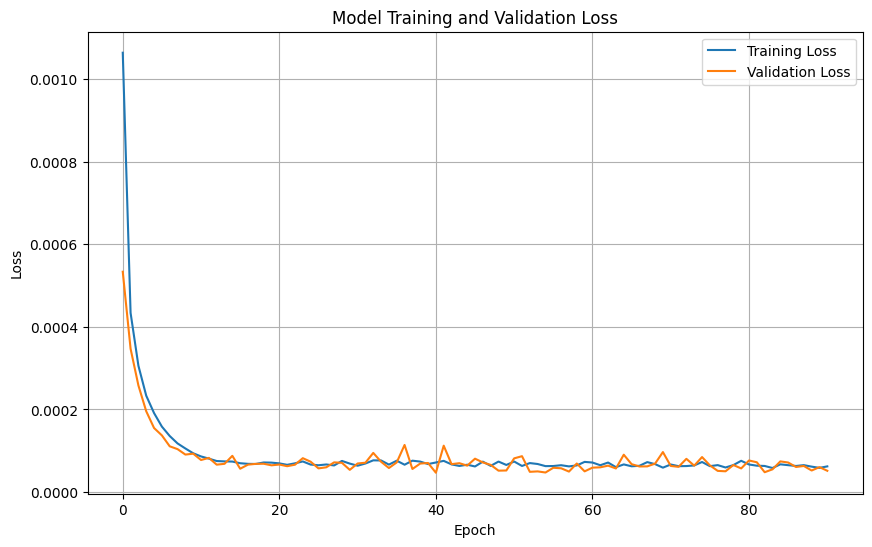

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


loss_values_from_third_epoch = history.history['loss'][1:]
val_loss_values = history.history['val_loss'][1:]

# Now plot starting from the 3rd epoch

plt.plot(loss_values_from_third_epoch, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.savefig('Model Training and Validation Loss.png',format='png')
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.819840660753535e-05
Mean Absolute Error: 0.0048040519254429195
R-squared: 0.9999507796022643


In [7]:
predictions_inverse_scaled = scaler1.inverse_transform(predictions)
predictions_df = pd.DataFrame(predictions_inverse_scaled)
predictions_df


,0,1,2
0,-39.052254,102.442696,2.712969
1,-41.636566,111.846115,2.966918
2,-25.953650,120.558197,4.753855
3,35.322903,132.887024,0.365802
4,-16.898985,111.791817,4.955828
...,...,...,...
2962,27.252226,138.716278,0.576340
2963,-26.517633,121.188179,4.739611
2964,40.763256,113.902069,6.152653
2965,-34.661209,113.127571,1.704714


In [8]:


predictions_df.columns = ['0','1','2']  # Clear any existing column names
predictions_df.columns = [ 'measured_y', 'measured_z','theta']


In [9]:
# bead_x = data.loc[test_indices, 'bead_x'].values
reference_y = data.loc[test_indices, 'reference_y'].values
reference_z = data.loc[test_indices, 'reference_z'].values


lookup_table = pd.DataFrame({
    'theta': predictions_df['theta'],
#     'measured_x': predictions_df['measured_x'],
    'measured_y': predictions_df['measured_y'],
    'measured_z': predictions_df['measured_z'],
#     'traps_x': input_train[test_indices, 1],
    'traps_y': input_train[test_indices, 0],
    'traps_z': input_train[test_indices, 1],
#     'simulated_x': bead_x,
    'reference_y': reference_y,
    'reference_z': reference_z,
})
lookup_table

,theta,measured_y,measured_z,traps_y,traps_z,reference_y,reference_z
0,2.712969,-39.052254,102.442696,-43.858305,103.682749,-43.841686,103.360943
1,2.966918,-41.636566,111.846115,-43.110879,112.076170,-42.775556,111.927768
2,4.753855,-25.953650,120.558197,-27.302437,117.937062,-28.508862,117.895477
3,0.365802,35.322903,132.887024,34.222157,133.354134,35.885862,133.557822
4,4.955828,-16.898985,111.791817,-17.635968,109.918091,-18.464252,109.732995
...,...,...,...,...,...,...,...
2962,0.576340,27.252226,138.716278,25.845103,138.351896,27.183214,138.653718
2963,4.739611,-26.517633,121.188179,-27.901015,118.520598,-29.128234,118.490183
2964,6.152653,40.763256,113.902069,39.792526,113.610067,41.502822,113.538425
2965,1.704714,-34.661209,113.127571,-33.884107,113.754279,-35.293491,113.652881


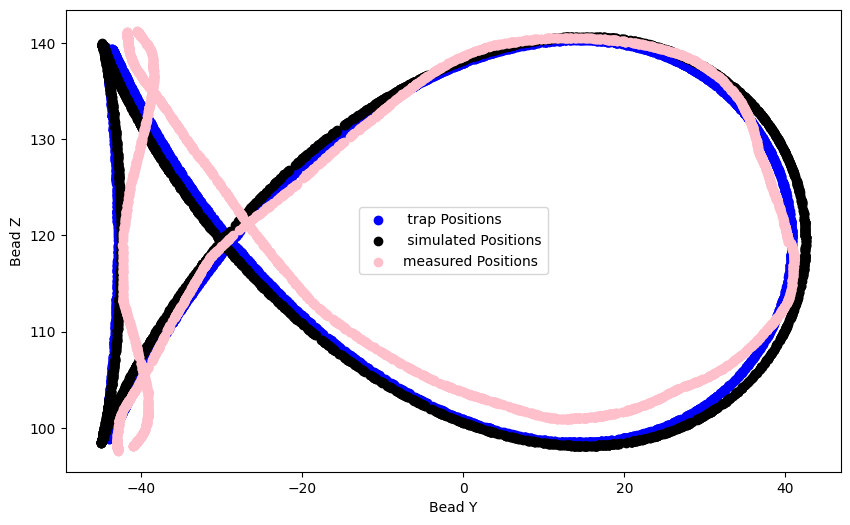

In [32]:

# Plot the predictions vs reference positions
plt.figure(figsize=(10, 6))
plt.scatter(lookup_table['traps_y'], lookup_table['traps_z'], color='blue', label=' trap Positions', lw=1)
plt.scatter(lookup_table['reference_y'], lookup_table['reference_z'], color='black', label=' simulated Positions')
plt.scatter(lookup_table['measured_y'], lookup_table['measured_z'], color='pink', label='measured Positions')

plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.legend()
plt.show()

In [33]:

# # Plot the predictions vs reference positions
# plt.figure(figsize=(10, 6))
# plt.scatter(data['traps_y'], data['traps_z'], color='blue', label=' trap Positions', lw=1)
# plt.scatter(data['bead_y'], data['bead_z'], color='black', label=' simulated Positions')
# plt.scatter(data['measured_y'], data['measured_z'], color='pink', label='measured Positions')

# plt.xlabel('Bead Y')
# plt.ylabel('Bead Z')
# plt.legend()
# plt.show()

In [34]:
# theta_lookup=lookup_table.sort_values(by='theta')['theta'].reset_index(drop=True)


In [35]:
# lookup_table = lookup_table.sort_values(by='theta').reset_index(drop=True)
# lookup_table

In [36]:
# change of logic - using theta static and static reference positions calculations

In [10]:
theta_pred = predictions_df.sort_values(by='theta')['theta']
theta_lookup=predictions_df['theta']
theta_lookup

0       2.712969
1       2.966918
2       4.753855
3       0.365802
4       4.955828
          ...   
2962    0.576340
2963    4.739611
2964    6.152653
2965    1.704714
2966    1.397123
Name: theta, Length: 2967, dtype: float32

In [11]:
h_center = tf.constant(0.1194, dtype=tf.float32)
q_y = tf.cos(theta_lookup) - (tf.sin(theta_lookup)**2 / tf.sqrt(tf.constant(2.0, dtype=tf.float32)))
q_z = tf.sin(theta_lookup) * tf.cos(theta_lookup)
bead_y = q_y*42.2
bead_z = (q_z + h_center)*42 +114.40

reference_positions_final = np.column_stack((bead_y, bead_z, theta_lookup))
reference_positions_final = tf.convert_to_tensor(reference_positions_final, dtype=tf.float32)


In [39]:
# #checking the range of values for all parameters involved
# plt.figure(figsize=(10, 6))
# plt.scatter(reference_positions[:, 0], reference_positions[:, 1], color='blue', label='simulation', s=1)
# plt.scatter(input_nn2_scaled[:, 0], input_nn2_scaled[:, 1], color='pink', label='measured positions scaled', lw=1)
# plt.scatter(output_nn2_scaled[:, 0], output_nn2_scaled[:, 1], color='green', label='traps scaled', s=1)


# plt.xlabel('Bead Y')
# plt.ylabel('Bead Z')
# plt.legend()
# plt.show()

In [12]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Extract and scale input and output data
input_nn2 = lookup_table[['measured_y', 'measured_z', 'theta']].values
output_nn2 = lookup_table[['traps_y', 'traps_z', 'reference_y', 'reference_z', 'theta']].values


# input_nn2 = data[['measured_y', 'measured_z', 'theta']].values
# output_nn2 = data[['traps_y', 'traps_z', 'reference_y', 'reference_z', 'theta']].values


input_scaler = StandardScaler()
output_scaler = StandardScaler()

input_nn2_scaled = input_scaler.fit_transform(input_nn2)
output_nn2_scaled = output_scaler.fit_transform(output_nn2)

# Reshape the data for LSTM input
input_scaled_nn2 = input_nn2_scaled.reshape((input_nn2_scaled.shape[0], 1, input_nn2_scaled.shape[1]))
output_scaled_nn2 = output_nn2_scaled


In [13]:
X_train_nn2, X_test_nn2, y_train_nn2, y_test_nn2 = train_test_split(input_scaled_nn2, output_scaled_nn2, test_size=0.15, random_state=42)

# Define the second model architecture
model2 = Sequential([
    LSTM(64, activation='relu', input_shape=(1, input_nn2.shape[1]), return_sequences=False),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(output_nn2.shape[1])
])

def custom_cost_function(y_true_nn2, y_pred_nn2):
    batch_size = tf.shape(y_pred_nn2)[0]

    # Extract theta and predicted positions from y_pred
    traps_pred = y_pred_nn2[:, 0:2]
    theta_pred = y_pred_nn2[:, 4:5]

    # Reshape to match the input shape for model1
    input_for_nn1 = tf.concat([traps_pred, theta_pred], axis=1)
    input_for_nn1 = tf.expand_dims(input_for_nn1, axis=1)  # Reshape

    # Get predicted bead positions from model1
    predicted_bead_positions = model1(input_for_nn1, training=False)

    # Scale reference_positions_final
    reference_positions_final_scaled = (reference_positions_final - tf.convert_to_tensor(input_scaler.mean_, dtype=tf.float32)) / tf.convert_to_tensor(input_scaler.scale_, dtype=tf.float32)
    
    reference_positions_final_batch = tf.gather(reference_positions_final_scaled, tf.range(batch_size))

    # Calculate deviation
    deviation = tf.reduce_mean(tf.reduce_sum(tf.abs(predicted_bead_positions - reference_positions_final_batch), axis=1))  # Only consider y and z

    return deviation

# Compile and train the model with the custom cost function
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
model2.compile(loss=custom_cost_function, optimizer='adam')

start_time_training = time.time()
history = model2.fit(X_train_nn2, y_train_nn2, epochs=400, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])
end_time_training = time.time()
training_time = end_time_training - start_time_training

start_time_inference = time.time()
y_pred_nn2 = model2.predict(X_test_nn2)
end_time_inference = time.time()

Epoch 1/400
71/71 [==============================] - 3s 7ms/step - loss: 2.3708 - val_loss: 2.3354
Epoch 2/400
71/71 [==============================] - 0s 3ms/step - loss: 2.3443 - val_loss: 2.3393
Epoch 3/400
71/71 [==============================] - 0s 3ms/step - loss: 2.3436 - val_loss: 2.3353
Epoch 4/400
71/71 [==============================] - 0s 3ms/step - loss: 2.3445 - val_loss: 2.3354
Epoch 5/400
71/71 [==============================] - 0s 3ms/step - loss: 2.3434 - val_loss: 2.3387
Epoch 6/400
71/71 [==============================] - 0s 3ms/step - loss: 2.3435 - val_loss: 2.3424
Epoch 7/400
71/71 [==============================] - 0s 3ms/step - loss: 2.3429 - val_loss: 2.3363
Epoch 8/400
71/71 [==============================] - 0s 3ms/step - loss: 2.3445 - val_loss: 2.3362
Epoch 9/400
71/71 [==============================] - 0s 3ms/step - loss: 2.3442 - val_loss: 2.3362
Epoch 10/400
71/71 [==============================] - 0s 3ms/step - loss: 2.3437 - val_loss: 2.3382
Epoch 11/

71/71 [==============================] - 0s 3ms/step - loss: 2.3425 - val_loss: 2.3374
Epoch 84/400
71/71 [==============================] - 0s 3ms/step - loss: 2.3428 - val_loss: 2.3368
Epoch 85/400
71/71 [==============================] - 0s 3ms/step - loss: 2.3429 - val_loss: 2.3361
Epoch 86/400
71/71 [==============================] - 0s 3ms/step - loss: 2.3423 - val_loss: 2.3362
Epoch 87/400
14/14 [==============================] - 0s 1ms/step


In [42]:
np.save('y_test_nn2_beforescaled.npy', y_test_nn2)
np.save('y_pred_nn2_bfeorescaled.npy', y_pred_nn2) 

In [14]:
y_test_nn2.shape

(446, 5)

In [15]:
inference_time = end_time_inference - start_time_inference
print(f'Training Time: {training_time:.2f} seconds')
print(f'Inference Time: {inference_time:.4f} seconds per sample')

Training Time: 21.13 seconds
Inference Time: 0.1903 seconds per sample


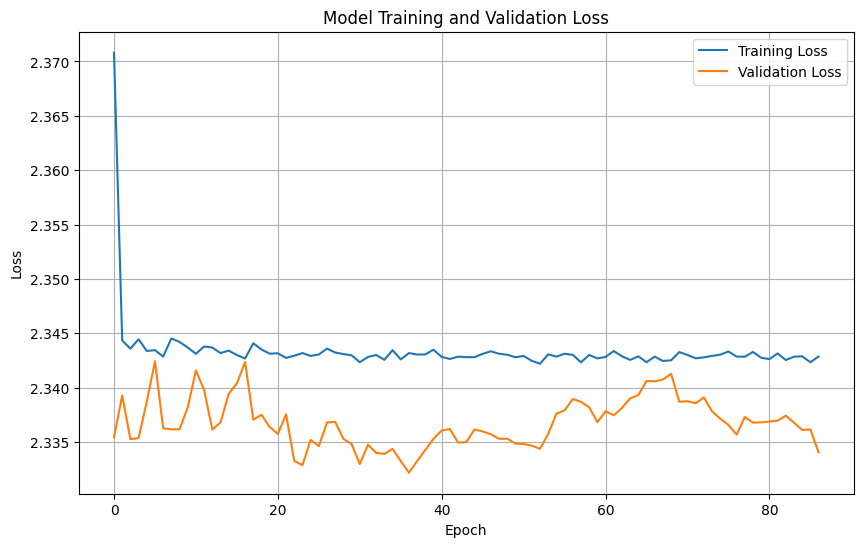

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


loss_values_from_third_epoch = history.history['loss'][:]
val_loss_values = history.history['val_loss'][:]

# Now plot starting from the 3rd epoch

plt.plot(loss_values_from_third_epoch, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.savefig('Model Training and Validation Loss before theta static scaled.png', format='png')
plt.show()


In [17]:
y_pred_nn2_inverse = output_scaler.inverse_transform(y_pred_nn2)
y_pred_nn2_inverse = pd.DataFrame(y_pred_nn2_inverse)
y_pred_nn2_inverse

,0,1,2,3,4
0,-22.830914,116.317932,-8.985927,119.341820,2.905024
1,-24.768291,115.832031,-8.570644,119.154160,2.889175
2,-23.591158,116.049225,-8.965211,119.189240,2.899677
3,-24.446003,115.848358,-8.349344,119.131935,2.890970
4,-22.973867,116.258842,-9.085684,119.292381,2.906363
...,...,...,...,...,...
441,-23.764006,116.018799,-8.616014,119.176399,2.896892
442,-23.068968,116.216942,-9.006809,119.246544,2.904106
443,-24.581142,115.810768,-8.277006,119.095779,2.890027
444,-24.616259,115.789490,-8.765708,119.094170,2.891703


Predictions: [[-0.38298267 -0.22854301  0.05147836 -0.01910383 -0.07707526]
 [-0.44418487 -0.2621666   0.06421968 -0.03185669 -0.08532338]
 [-0.406999   -0.24713737  0.05211395 -0.02947285 -0.07985824]
 [-0.43400368 -0.26103714  0.07100942 -0.03336725 -0.08438934]
 [-0.38749865 -0.23263171  0.04841769 -0.02246333 -0.07637858]]
Actual Outputs: [[ 1.57789608 -0.51059956  1.58378476 -0.50768971  1.59530806]
 [-0.13985694  0.75797932 -0.15925353  0.7587002  -0.91653229]
 [-1.02888901 -0.69500261 -0.99214515 -0.69624794 -0.08075125]
 [-1.05020281  1.12584193 -1.02248406  1.12847948  0.28742304]
 [ 0.29510042 -1.26355898  0.28329451 -1.26252224  1.13661195]]


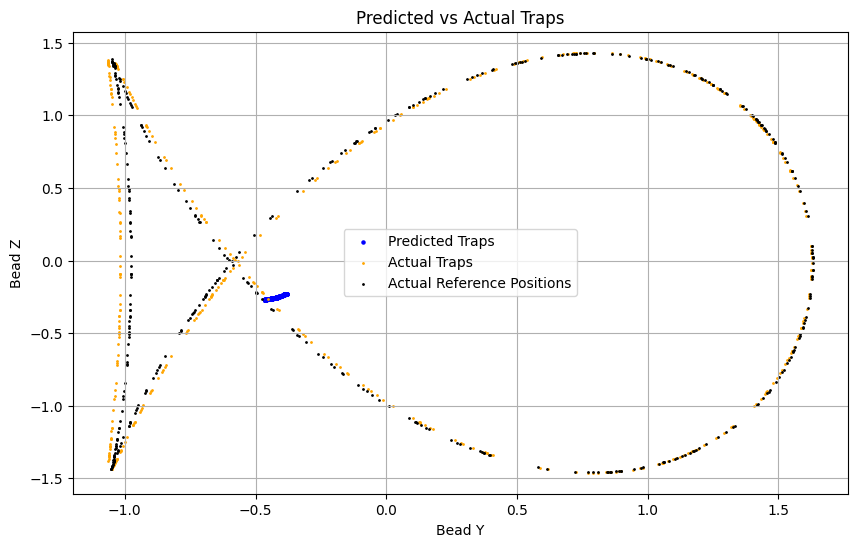

In [18]:
# Predict on the test set
# predictions_nn2 = model2.predict(X_test)

# Print predictions and actual outputs for comparison
print("Predictions:", y_pred_nn2[:5])
print("Actual Outputs:", y_test_nn2[:5])

# Plot the predictions vs reference positions
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_nn2[:, 0], y_pred_nn2[:, 1], color='blue', label='Predicted Traps', s=5)
plt.scatter(y_test_nn2[:, 0], y_test_nn2[:, 1], color='orange', label='Actual Traps',s=1)
plt.scatter(y_test_nn2[:, 2], y_test_nn2[:, 3], color='black', label='Actual Reference Positions',s=1)
# plt.scatter(lookup_table['measured_y'], lookup_table['measured_z'], color='pink', label='measured Positions')
plt.title('Predicted vs Actual Traps')
plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.legend()
plt.grid()

plt.savefig('Predicted vs Actual Traps.png', format='png')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
mae = mean_absolute_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
r2 = r2_score(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.1654992781037272
Mean Absolute Error: 0.9189600913714338
R-squared: -0.15781590922598154


In [20]:
y_test_nn2.shape

(446, 5)

In [48]:
input_for_model1 = np.concatenate([y_pred_nn2[:, 0:2], y_pred_nn2[:, 4:5]], axis=1)
input_for_model1 = input_for_model1.reshape((input_for_model1.shape[0], 1, input_for_model1.shape[1]))

# Predict using model1 with the final input
final_predictions = model1.predict(input_for_model1)
final_predictions

14/14 [==============================] - 0s 960us/step


array([[-0.6034454 , -0.2479728 , -0.041971  ],
       [-0.6355635 , -0.24521941, -0.0445093 ],
       [-0.60439175, -0.24254318, -0.03644764],
       ...,
       [-0.6297845 , -0.24665466, -0.04205687],
       [-0.65247214, -0.26741964, -0.03913016],
       [-0.60357684, -0.24754868, -0.04173076]], dtype=float32)

In [49]:
final_predictions.shape

(446, 3)

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(final_predictions[:, 0:2], y_test_nn2[:, 2:4])
mae = mean_absolute_error(final_predictions[:, 0:2], y_test_nn2[:, 2:4])
r2 = r2_score(final_predictions[:, 0:2], y_test_nn2[:, 2:4])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.2822634981871266
Mean Absolute Error: 0.9293404727922165
R-squared: -9459.869350246392


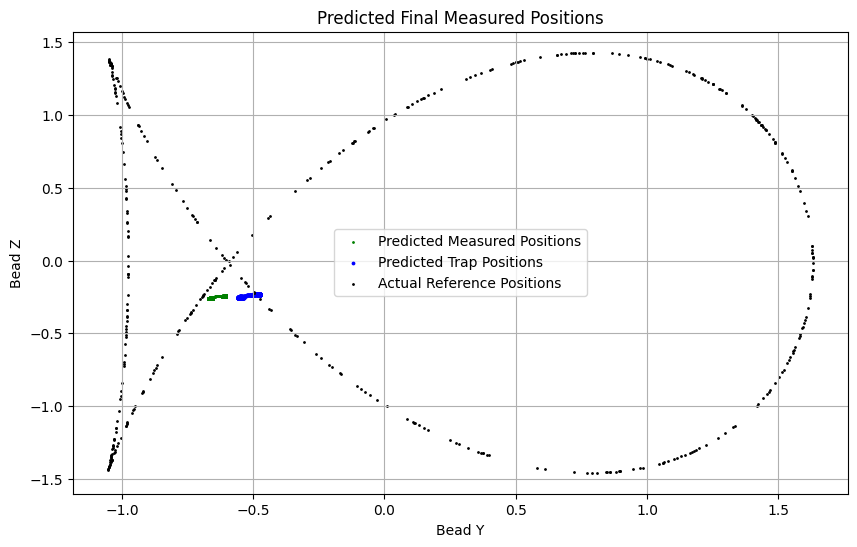

In [58]:
plt.figure(figsize=(10, 6))
# plt.scatter(y_test_nn2[:, 0], y_test_nn2[:, 1], color='orange', label='original trap Positions')

plt.scatter(final_predictions[:, 0], final_predictions[:, 1], color='green', label='Predicted Measured Positions',s=1)
plt.scatter(y_pred_nn2[:, 0], y_pred_nn2[:, 1], color='blue', label='Predicted Trap Positions', s=3)
plt.scatter(y_test_nn2[:, 2], y_test_nn2[:, 3], color='black', label='Actual Reference Positions',s=1)
plt.title('Predicted Final Measured Positions')
plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.grid()
plt.legend()

plt.savefig('Predicted Final Measured Positions.png',format='png')
plt.show()

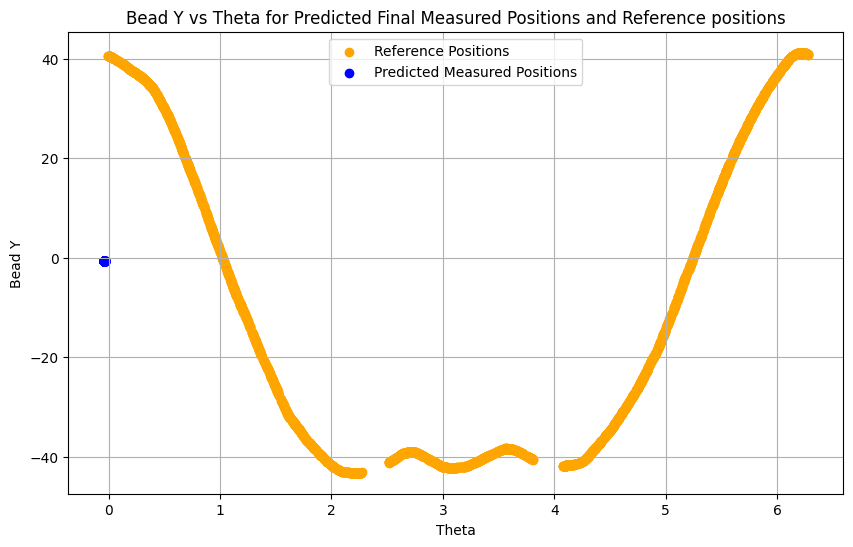

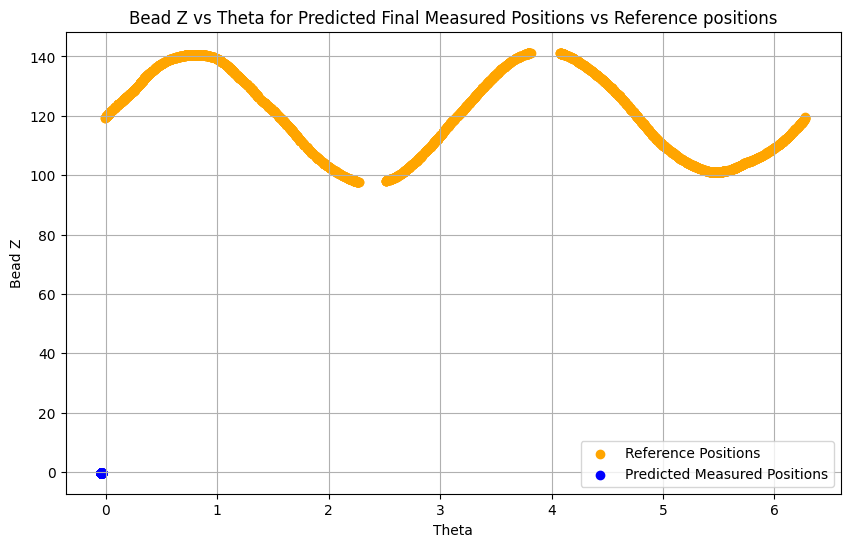

In [59]:

# Convert final predictions to DataFrame and add theta
final_predictions_df = pd.DataFrame(final_predictions, columns=['measured_y', 'measured_z', 'theta'])

# Sort final predictions by theta
final_predictions_sorted = final_predictions_df.sort_values(by=['theta','measured_y','measured_z'], ascending=True)

# Plotting predictions vs actual outputs sorted by theta
plt.figure(figsize=(10, 6))
plt.scatter(lookup_table['theta'], lookup_table['measured_y'], color='orange', label='Reference Positions')
plt.scatter(final_predictions_sorted['theta'], final_predictions_sorted['measured_y'], color='blue', label='Predicted Measured Positions')
plt.xlabel('Theta')
plt.ylabel('Bead Y')
plt.title('Bead Y vs Theta for Predicted Final Measured Positions and Reference positions')
plt.savefig('BeadYtheta.png',format='png')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(lookup_table['theta'], lookup_table['measured_z'], color='orange', label='Reference Positions')
plt.scatter(final_predictions_sorted['theta'], final_predictions_sorted['measured_z'], color='blue', label='Predicted Measured Positions')
plt.xlabel('Theta')
plt.ylabel('Bead Z')
plt.title('Bead Z vs Theta for Predicted Final Measured Positions vs Reference positions')
plt.savefig('BeadZtheta.png',format='png')
plt.legend()
plt.grid()
plt.show()

In [53]:
final_predictions_inverse = scaler1.inverse_transform(final_predictions_sorted)
final_predictionsdf = pd.DataFrame(final_predictions_inverse)
final_predictionsdf


,0,1,2
0,-32.253380,115.952477,3.000413
1,-32.252426,115.952950,3.000418
2,-32.278439,115.937981,3.000431
3,-32.286694,115.932281,3.000444
4,-32.294857,115.925751,3.000460
...,...,...,...
441,-30.386621,116.145752,3.026271
442,-30.387165,116.145645,3.026281
443,-30.391148,116.144760,3.026355
444,-30.392660,116.144386,3.026386


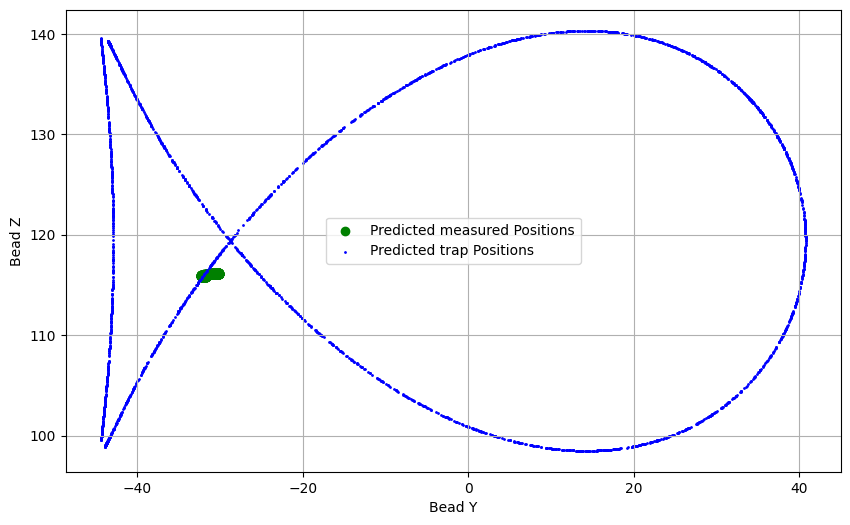

In [56]:
plt.figure(figsize=(10, 6))
# plt.scatter(y_test_nn2[:, 0], y_test_nn2[:, 1], color='orange', label='original trap Positions')
# plt.scatter(y_test_nn2[:, 2], y_test_nn2[:, 3], color='black', label='Original simulated Positions')
plt.scatter(final_predictionsdf[ 0], final_predictionsdf[ 1], color='green', label='Predicted measured Positions')
plt.scatter(lookup_table['traps_y'], lookup_table['traps_z'], color='blue', label='Predicted trap Positions', s=1)

plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.legend()
plt.grid()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
mae = mean_absolute_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
r2 = r2_score(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 35.572784344173314
Mean Absolute Error: 4.893406039999309
R-squared: -34.7429632273308


In [33]:
# model2.save('model2_static_theta.keras')

In [19]:
beforethetascaled = np.abs(y_test_nn2 - y_pred_nn2)[:, 0]  # Replace with actual predictions

# Save the errors to .npy files
np.save('beforethetascaled.npy', beforethetascaled)

NameError: name 'y_test_nn2' is not defined